<a href="https://colab.research.google.com/github/JoseAlbertoSeco/BlablacarCarpooling_DataMining/blob/Patterns/notebooks/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
from sklearn import linear_model
from sklearn import tree 

# Carga de datos

In [25]:
!wget https://github.com/JoseAlbertoSeco/MineriaDatos/raw/main/data/processed/df_CLM.csv
!wget https://github.com/JoseAlbertoSeco/MineriaDatos/raw/main/data/processed/df_Andalucia.csv

--2021-12-29 11:15:53--  https://github.com/JoseAlbertoSeco/MineriaDatos/raw/main/data/processed/df_CLM.csv
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/JoseAlbertoSeco/BlablacarCarpooling_DataMining/raw/main/data/processed/df_CLM.csv [following]
--2021-12-29 11:15:53--  https://github.com/JoseAlbertoSeco/BlablacarCarpooling_DataMining/raw/main/data/processed/df_CLM.csv
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/JoseAlbertoSeco/BlablacarCarpooling_DataMining/main/data/processed/df_CLM.csv [following]
--2021-12-29 11:15:53--  https://raw.githubusercontent.com/JoseAlbertoSeco/BlablacarCarpooling_DataMining/main/data/processed/df_CLM.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.1

## Carga provincial

In [26]:
andalucia = pd.read_csv("df_Andalucia.csv") 
andalucia = andalucia.drop(andalucia.columns[[0]], axis=1)
andalucia.head(3)

,DIA,AÑO,SEMANA,MES,PAIS,ORIGEN,DESTINO,ASIENTOS_OFERTADOS,ASIENTOS_CONFIRMADOS,VIAJES_OFERTADOS,VIAJES_CONFIRMADOS,OFERTANTES,OFERTANTES_NUEVOS,CA_ORIGEN,CA_DESTINO,PROVINCIA_ORIGEN,PROVINCIA_DESTINO,INTERPROVINCIAL
0,2019-08-28,2019,35,8,es,Sevilla,Granada,62.0,25,25,14,25,0,Andalucía,Andalucía,Sevilla,Granada,No
1,2019-08-28,2019,35,8,es,Sevilla,Jerez de la Frontera,109.0,15,39,10,35,3,Andalucía,Andalucía,Sevilla,Cádiz,No
2,2019-08-28,2019,35,8,es,Sevilla,Algeciras,29.0,6,11,4,10,1,Andalucía,Andalucía,Sevilla,Cádiz,No


In [27]:
clm = pd.read_csv("df_CLM.csv") 
clm = clm.drop(clm.columns[[0]], axis=1)
clm.head(3)

,DIA,AÑO,SEMANA,MES,PAIS,ORIGEN,DESTINO,ASIENTOS_OFERTADOS,ASIENTOS_CONFIRMADOS,VIAJES_OFERTADOS,VIAJES_CONFIRMADOS,OFERTANTES,OFERTANTES_NUEVOS,CA_ORIGEN,CA_DESTINO,PROVINCIA_ORIGEN,PROVINCIA_DESTINO,INTERPROVINCIAL
0,2019-09-01,2019,35,9,es,Tarancón,Albacete,8.0,1,7,1,7,0,Castilla-La Mancha,Castilla-La Mancha,Cuenca,Albacete,No
1,2018-05-01,2018,18,5,es,Tarancón,Albacete,10.0,1,6,1,6,0,Castilla-La Mancha,Castilla-La Mancha,Cuenca,Albacete,No
2,2018-12-06,2018,49,12,es,Tarancón,Albacete,6.0,1,5,1,5,1,Castilla-La Mancha,Castilla-La Mancha,Cuenca,Albacete,No


# Label Encoding

Transformamos categorias categóricas en categorias numéricas

## Encoding Andalucia

In [28]:
andalucia.dtypes

DIA                      object
AÑO                       int64
SEMANA                    int64
MES                       int64
PAIS                     object
ORIGEN                   object
DESTINO                  object
ASIENTOS_OFERTADOS      float64
ASIENTOS_CONFIRMADOS      int64
VIAJES_OFERTADOS          int64
VIAJES_CONFIRMADOS        int64
OFERTANTES                int64
OFERTANTES_NUEVOS         int64
CA_ORIGEN                object
CA_DESTINO               object
PROVINCIA_ORIGEN         object
PROVINCIA_DESTINO        object
INTERPROVINCIAL          object
dtype: object

In [29]:
andalucia_to_encoded = andalucia.copy()

In [30]:
# 'ORIGEN', 'DESTINO', 'CA_ORIGEN', 'CA_DESTINO', 'PROVINCIA_ORIGEN', 'PROVINCIA_DESTINO', 'INTERPROVINCIAL'
andalucia_to_encoded['ORIGEN'] = andalucia['ORIGEN'].astype('category').cat.codes

In [31]:
andalucia_to_encoded['DESTINO_LE'] = andalucia['DESTINO'].astype('category').cat.codes

In [32]:
andalucia_to_encoded['CA_ORIGEN_LE'] = andalucia['CA_ORIGEN'].astype('category').cat.codes

In [33]:
andalucia_to_encoded['CA_DESTINO_LE'] = andalucia['CA_DESTINO'].astype('category').cat.codes

In [34]:
andalucia_to_encoded['PROVINCIA_ORIGEN_LE'] = andalucia['PROVINCIA_ORIGEN'].astype('category').cat.codes

In [35]:
andalucia_to_encoded['PROVINCIA_DESTINO_LE'] = andalucia['PROVINCIA_DESTINO'].astype('category').cat.codes

In [36]:
andalucia_to_encoded['INTERPROVINCIAL_LE'] = andalucia['INTERPROVINCIAL'].astype('category').cat.codes

In [37]:
andalucia_to_encoded.tail(5)

,DIA,AÑO,SEMANA,MES,PAIS,ORIGEN,DESTINO,ASIENTOS_OFERTADOS,ASIENTOS_CONFIRMADOS,VIAJES_OFERTADOS,VIAJES_CONFIRMADOS,OFERTANTES,OFERTANTES_NUEVOS,CA_ORIGEN,CA_DESTINO,PROVINCIA_ORIGEN,PROVINCIA_DESTINO,INTERPROVINCIAL,DESTINO_LE,CA_ORIGEN_LE,CA_DESTINO_LE,PROVINCIA_ORIGEN_LE,PROVINCIA_DESTINO_LE,INTERPROVINCIAL_LE
29305,2018-08-28,2018,35,8,es,19,Estepona,45.0,4,22,4,22,1,Andalucía,Andalucía,Málaga,Málaga,Si,135,0,0,6,7,1
29306,2018-08-28,2018,35,8,es,19,Lucena,15.0,1,6,1,6,0,Andalucía,Andalucía,Málaga,Córdoba,No,212,0,0,6,2,0
29307,2018-08-28,2018,35,8,es,19,Conil de la Frontera,1.0,1,1,1,1,0,Andalucía,Andalucía,Málaga,Cádiz,No,103,0,0,6,1,0
29308,2018-08-28,2018,35,8,es,19,La Línea de la Concepción,19.0,1,8,1,8,1,Andalucía,Andalucía,Málaga,Cádiz,No,188,0,0,6,1,0
29309,2018-08-28,2018,35,8,es,19,Osuna,4.0,1,1,1,1,0,Andalucía,Andalucía,Málaga,Sevilla,No,257,0,0,6,8,0


In [38]:
andalucia_encoded = andalucia_to_encoded.drop(columns=['ORIGEN', 'DESTINO', 'CA_ORIGEN', 'CA_DESTINO', 'PROVINCIA_ORIGEN', 'PROVINCIA_DESTINO', 'INTERPROVINCIAL', 'PAIS'])
andalucia_encoded.head(2)

,DIA,AÑO,SEMANA,MES,ASIENTOS_OFERTADOS,ASIENTOS_CONFIRMADOS,VIAJES_OFERTADOS,VIAJES_CONFIRMADOS,OFERTANTES,OFERTANTES_NUEVOS,DESTINO_LE,CA_ORIGEN_LE,CA_DESTINO_LE,PROVINCIA_ORIGEN_LE,PROVINCIA_DESTINO_LE,INTERPROVINCIAL_LE
0,2019-08-28,2019,35,8,62.0,25,25,14,25,0,152,0,0,7,3,0
1,2019-08-28,2019,35,8,109.0,15,39,10,35,3,176,0,0,7,1,0


## Encoding Castilla-La Mancha

In [39]:
clm_to_encode = clm.copy()

In [40]:
# 'ORIGEN', 'DESTINO', 'CA_ORIGEN', 'CA_DESTINO', 'PROVINCIA_ORIGEN', 'PROVINCIA_DESTINO', 'INTERPROVINCIAL'
clm_to_encode['ORIGEN_LE'] = clm['ORIGEN'].astype('category').cat.codes

In [41]:
clm_to_encode['DESTINO_LE'] = clm['DESTINO'].astype('category').cat.codes

In [42]:
clm_to_encode['CA_ORIGEN_LE'] = clm['CA_ORIGEN'].astype('category').cat.codes

In [43]:
clm_to_encode['CA_DESTINO_LE'] = clm['CA_DESTINO'].astype('category').cat.codes

In [44]:
clm_to_encode['PROVINCIA_ORIGEN_LE'] = clm['PROVINCIA_ORIGEN'].astype('category').cat.codes

In [45]:
clm_to_encode['PROVINCIA_DESTINO_LE'] = clm['PROVINCIA_DESTINO'].astype('category').cat.codes

In [46]:
clm_to_encode['INTERPROVINCIAL_LE'] = clm['INTERPROVINCIAL'].astype('category').cat.codes

In [47]:
clm_to_encode.tail(5)

,DIA,AÑO,SEMANA,MES,PAIS,ORIGEN,DESTINO,ASIENTOS_OFERTADOS,ASIENTOS_CONFIRMADOS,VIAJES_OFERTADOS,VIAJES_CONFIRMADOS,OFERTANTES,OFERTANTES_NUEVOS,CA_ORIGEN,CA_DESTINO,PROVINCIA_ORIGEN,PROVINCIA_DESTINO,INTERPROVINCIAL,ORIGEN_LE,DESTINO_LE,CA_ORIGEN_LE,CA_DESTINO_LE,PROVINCIA_ORIGEN_LE,PROVINCIA_DESTINO_LE,INTERPROVINCIAL_LE
2681,2018-08-16,2018,33,8,es,Villarrobledo,Cuenca,2.0,1,1,1,1,0,Castilla-La Mancha,Castilla-La Mancha,Albacete,Cuenca,No,19,14,0,0,0,3,0
2682,2019-05-15,2019,20,5,es,Villarrobledo,Albacete,27.0,1,10,1,9,1,Castilla-La Mancha,Castilla-La Mancha,Albacete,Albacete,Si,19,0,0,0,0,0,1
2683,2019-08-16,2019,33,8,es,Villarrobledo,Ciudad Real,10.0,1,8,1,7,1,Castilla-La Mancha,Castilla-La Mancha,Albacete,Ciudad Real,No,19,12,0,0,0,1,0
2684,2019-05-19,2019,20,5,es,Villarrobledo,Albacete,29.0,2,11,1,11,1,Castilla-La Mancha,Castilla-La Mancha,Albacete,Albacete,Si,19,0,0,0,0,0,1
2685,2019-05-19,2019,20,5,es,Villarrobledo,Ciudad Real,7.0,2,4,1,4,0,Castilla-La Mancha,Castilla-La Mancha,Albacete,Ciudad Real,No,19,12,0,0,0,1,0


In [48]:
clm_encoded = clm_to_encode.drop(columns=['ORIGEN', 'DESTINO', 'CA_ORIGEN', 'CA_DESTINO', 'PROVINCIA_ORIGEN', 'PROVINCIA_DESTINO', 'INTERPROVINCIAL', 'PAIS'])
clm_encoded.head(2)

,DIA,AÑO,SEMANA,MES,ASIENTOS_OFERTADOS,ASIENTOS_CONFIRMADOS,VIAJES_OFERTADOS,VIAJES_CONFIRMADOS,OFERTANTES,OFERTANTES_NUEVOS,ORIGEN_LE,DESTINO_LE,CA_ORIGEN_LE,CA_DESTINO_LE,PROVINCIA_ORIGEN_LE,PROVINCIA_DESTINO_LE,INTERPROVINCIAL_LE
0,2019-09-01,2019,35,9,8.0,1,7,1,7,0,14,0,0,0,2,0,0
1,2018-05-01,2018,18,5,10.0,1,6,1,6,0,14,0,0,0,2,0,0


# Regression

El proceso de regresión se realizará con los datos de **clm_encoded** y **andalucia_encoded**.

## Feature Selection

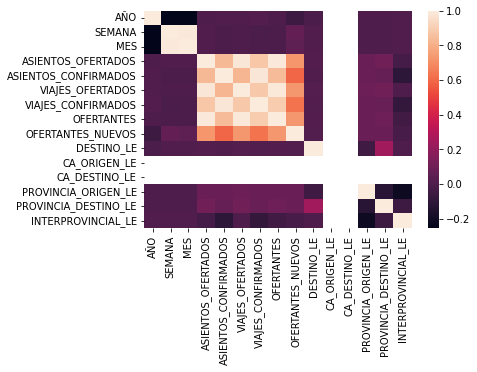

In [50]:
import seaborn as sns

mtx_corr = andalucia_encoded.corr()
# plot the heatmap and annotation on it
sns.heatmap(mtx_corr, xticklabels=mtx_corr.columns, yticklabels=mtx_corr.columns, annot=False)

OFERTANTES_NUEVOS, ASIENTOS_OFERTADOS, ASIENTOS_CONFIRMADOS, VIAJES_OFERTADOS, OFERTANTES

In [51]:
features_selected = ['OFERTANTES_NUEVOS', 'ASIENTOS_OFERTADOS', 'ASIENTOS_CONFIRMADOS', 'VIAJES_OFERTADOS', 'OFERTANTES']

In [63]:
date_index =andalucia_encoded.sort_values(by='DIA') 
date_index = date_index.set_index('DIA')

train = date_index.loc['2017-11-01':'2018-12-25']
test = date_index.loc['2019-01-01':]

train.reset_index(drop = True, inplace = True)
test.reset_index(drop = True, inplace = True)

## KNN

In [64]:
def neigh_classi(cv, iterations, metric = 'minkowski'):
  for i, weights in enumerate(['uniform', 'distance']):
    total_scores = []
    for n_neighbors in range(1,iterations):
      fold_accuracy = []
      knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights, metric=metric)
      # verificar cada uno de los modelos con validación cruzada.
      for train_fold, test_fold in cv.split(train):
        # División train test aleatoria
        f_train = train.loc[train_fold]
        f_test = train.loc[test_fold]
        # entrenamiento y ejecución del modelo
        knn.fit( X = f_train.drop(['VIAJES_CONFIRMADOS'], axis=1), 
                               y = f_train['VIAJES_CONFIRMADOS'])
        y_pred = knn.predict(X = f_test.drop(['VIAJES_CONFIRMADOS'], axis = 1))
        # evaluación del modelo
        mae = mean_absolute_error(f_test['VIAJES_CONFIRMADOS'], y_pred)
        fold_accuracy.append(mae)
      total_scores.append(sum(fold_accuracy)/len(fold_accuracy))
   
    plt.plot(range(1,len(total_scores)+1), total_scores, 
             marker='o', label=weights)
    print ('Min Value ' +  weights + " : " +  str(min(total_scores)) +" (" + str(np.argmin(total_scores) + 1) + ")")
    plt.ylabel('MAE')  
    
    plt.title(metric,
            fontdict={'family': 'serif', 
                    'color' : 'red',
                    'weight': 'bold',
                    'size': 13})

  plt.legend()
  plt.show()
  return str(np.argmin(total_scores) + 1)

Min Value uniform : 0.8647209757268829 (7)
Min Value distance : 0.821551545808281 (7)


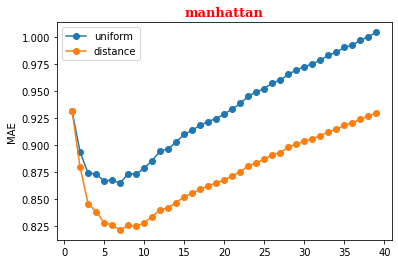

In [65]:
cv = KFold(n_splits = 5, shuffle = False) # shuffle == false cause we have temporal variable

neigh_m = neigh_classi(cv, 40, 'manhattan')

## Predicción

In [66]:
# constructor
n_neighbors = int(neigh_m)
weights = 'uniform'

knn = neighbors.KNeighborsRegressor(n_neighbors= n_neighbors, weights=weights, metric = 'manhattan') 

# fit and predict
knn.fit( X = train.drop(['VIAJES_CONFIRMADOS'], axis=1), y = train['VIAJES_CONFIRMADOS'])
y_pred = knn.predict(X = test.drop(['VIAJES_CONFIRMADOS'], axis =1))

mae = mean_absolute_error(test['VIAJES_CONFIRMADOS'], y_pred)
print('MAE', mae)

MAE 0.9092975049444698


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


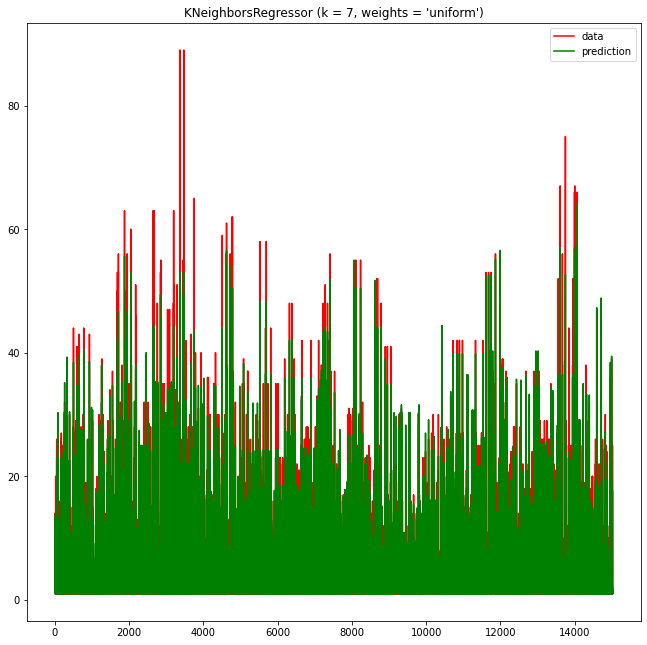

In [67]:

xx = np.stack(i for i in range(test['VIAJES_CONFIRMADOS'].shape[0]))
plt.figure(figsize=(11,11))
plt.plot(xx, test['VIAJES_CONFIRMADOS'], c='r', label='data')
#plt.plot(xx, y, c='k', label='data')

plt.plot(xx, y_pred, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors,
                                                                weights))

plt.show()